In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/trainity assignments/application_data.csv')

In [ ]:
df.shape

(49999, 122)

In [ ]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,49999.000000,49999.000000,49999.000000,4.999900e+04,4.999900e+04,49998.000000,4.996100e+04,49999.000000,49999.000000,49999.000000,...,49999.000000,49999.000000,49999.000000,49999.00000,43265.000000,43265.000000,43265.000000,43265.000000,43265.000000,43265.000000
mean,129013.210584,0.080522,0.419848,1.707676e+05,5.997006e+05,27107.377355,5.390600e+05,0.020798,-16022.042081,63219.424488,...,0.008500,0.000700,0.000520,0.00038,0.007096,0.007512,0.032382,0.270288,0.260973,1.881035
std,16690.512048,0.272102,0.724039,5.318191e+05,4.024154e+05,14562.944435,3.698533e+05,0.013761,4361.400270,140794.605668,...,0.091805,0.026449,0.022798,0.01949,0.087709,0.107992,0.194080,0.928560,0.606996,1.865054
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,2052.000000,4.500000e+04,0.000533,-25184.000000,-17531.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,114570.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16456.500000,2.385000e+05,0.010006,-19644.000000,-2786.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,129076.000000,0.000000,0.000000,1.458000e+05,5.147775e+05,24939.000000,4.500000e+05,0.018850,-15731.000000,-1221.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,143438.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12378.500000,-292.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,157875.000000,1.000000,11.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7680.000000,365243.000000,...,1.000000,1.000000,1.000000,1.00000,3.000000,6.000000,6.000000,24.000000,8.000000,25.000000


In [ ]:
df.duplicated().sum()

0

In [ ]:
null_percentage = (df.isnull().sum() / len(df)) * 100
null_percentage.sort_values(ascending=False)

,0
COMMONAREA_MEDI,69.921398
COMMONAREA_AVG,69.921398
COMMONAREA_MODE,69.921398
NONLIVINGAPARTMENTS_MODE,69.429389
NONLIVINGAPARTMENTS_AVG,69.429389
...,...
NAME_HOUSING_TYPE,0.000000
NAME_FAMILY_STATUS,0.000000
NAME_EDUCATION_TYPE,0.000000
NAME_INCOME_TYPE,0.000000


In [ ]:
null_percentage_filtered = null_percentage[null_percentage > 0]

In [ ]:
null_percentage_filtered = null_percentage_filtered.sort_values(ascending=False)

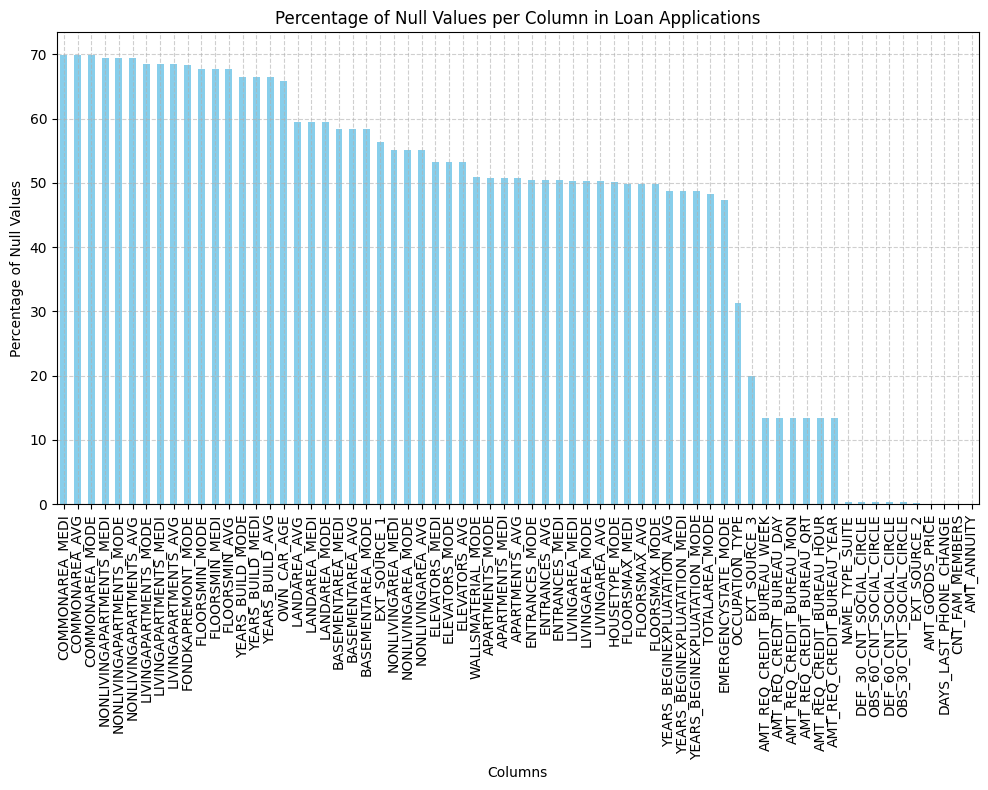

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
null_percentage_filtered.plot(kind='bar', color='skyblue')
plt.title('Percentage of Null Values per Column in Loan Applications')
plt.xlabel('Columns')
plt.ylabel('Percentage of Null Values')
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
drop_columns = null_percentage[null_percentage > 40].index

In [ ]:
df_cleaned = df.drop(columns=drop_columns)

In [ ]:
original_shape = df.shape
cleaned_shape = df_cleaned.shape
df_cleaned.shape

(49999, 73)

In [ ]:
import numpy as np

In [ ]:
negative_values_columns = {column: (df_cleaned[column] < 0).any()
                           for column in df_cleaned.select_dtypes(include=[np.number]).columns
                           if (df_cleaned[column] < 0).any()}

In [ ]:
for column in negative_values_columns:
    df_cleaned[column] = df_cleaned[column].abs() / 365

In [ ]:
df_cleaned[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']].head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,25.920548,1.745205,9.994521,5.808219,3.106849
1,45.931507,3.254795,3.249315,0.797260,2.268493
2,52.180822,0.616438,11.671233,6.934247,2.232877
3,52.068493,8.326027,26.939726,6.676712,1.690411
4,54.608219,8.323288,11.810959,9.473973,3.030137


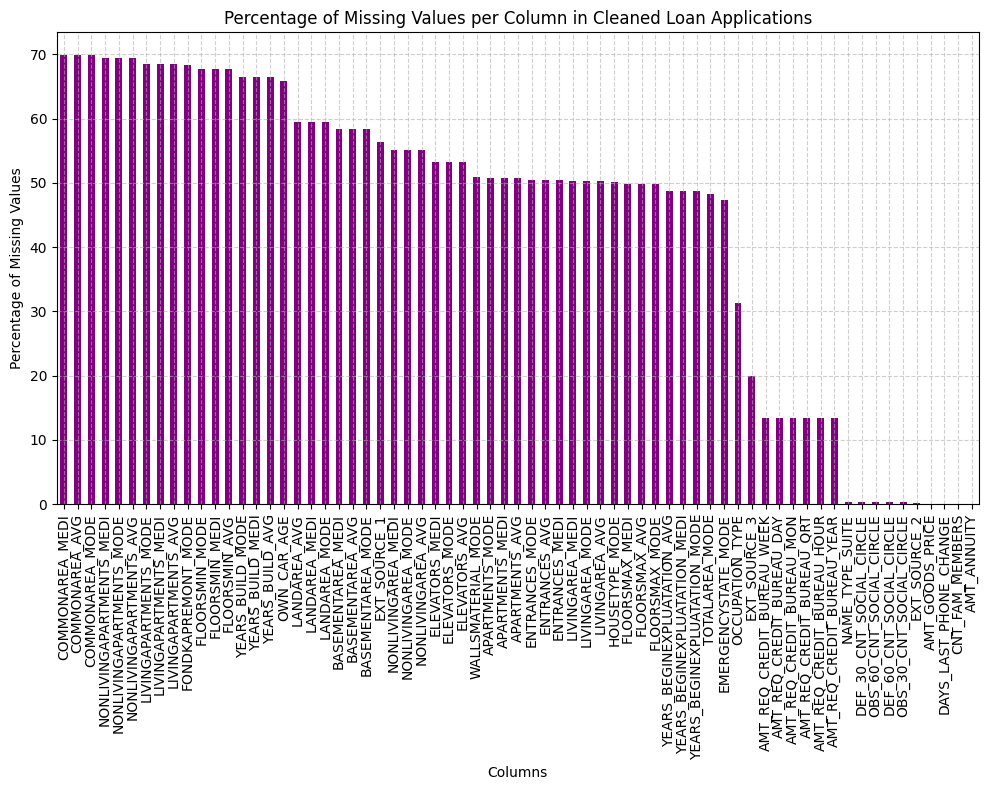

In [ ]:
plt.figure(figsize=(10, 8))
null_percentage_filtered.plot(kind='bar', color='purple')
plt.title('Percentage of Missing Values per Column in Cleaned Loan Applications')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
# List of columns I wanted to drop
document_flag_columns = [
    'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
    'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
    'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
    'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
    'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

In [ ]:
# Adjusting the list to include only columns still present in the dataset
document_flag_columns_adjusted = [col for col in document_flag_columns if col in df_cleaned.columns]

In [ ]:
# Drop these columns from the dataset
df_reduced = df_cleaned.drop(columns=document_flag_columns_adjusted)

In [ ]:
# Print the new shape of the DataFrame and the columns that were actually dropped
print("New DataFrame shape:", df_reduced.shape)
print("Columns dropped:", document_flag_columns_adjusted)

New DataFrame shape: (49999, 48)
Columns dropped: ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'EXT_SOURCE_2', 'EXT_SOURCE_3']


In [ ]:
#filling missing occupation types
df_reduced.loc[:, 'OCCUPATION_TYPE'] = df_reduced['OCCUPATION_TYPE'].fillna('Unknown')

In [ ]:
#handeling credit bureaeu data
credit_bureau_columns = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
                         'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
                         'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
for column in credit_bureau_columns:
    df_reduced.loc[:, column] = df_reduced[column].fillna(0)

In [ ]:
#Filling Other Missing Values: For other columns with fewer missing values, I used the mode for categorical data and the median for continuous data:
#For categorical data (like NAME_TYPE_SUITE), I filled missing entries with the most common value (mode).
#For numerical data (such as AMT_GOODS_PRICE), I used the median value.
for column in ['NAME_TYPE_SUITE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
               'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_GOODS_PRICE',
               'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE']:
    if df_reduced[column].dtype == 'object':
        mode_value = df_reduced[column].mode()[0]
        df_reduced.loc[:, column] = df_reduced[column].fillna(mode_value)
    else:
        median_value = df_reduced[column].median()
        df_reduced.loc[:, column] = df_reduced[column].fillna(median_value)

In [ ]:
df_reduced.isnull().sum().max()

0

In [ ]:
file_path = '/content/drive/My Drive/df_reduced.csv'
df_reduced.to_csv(file_path, index=False)

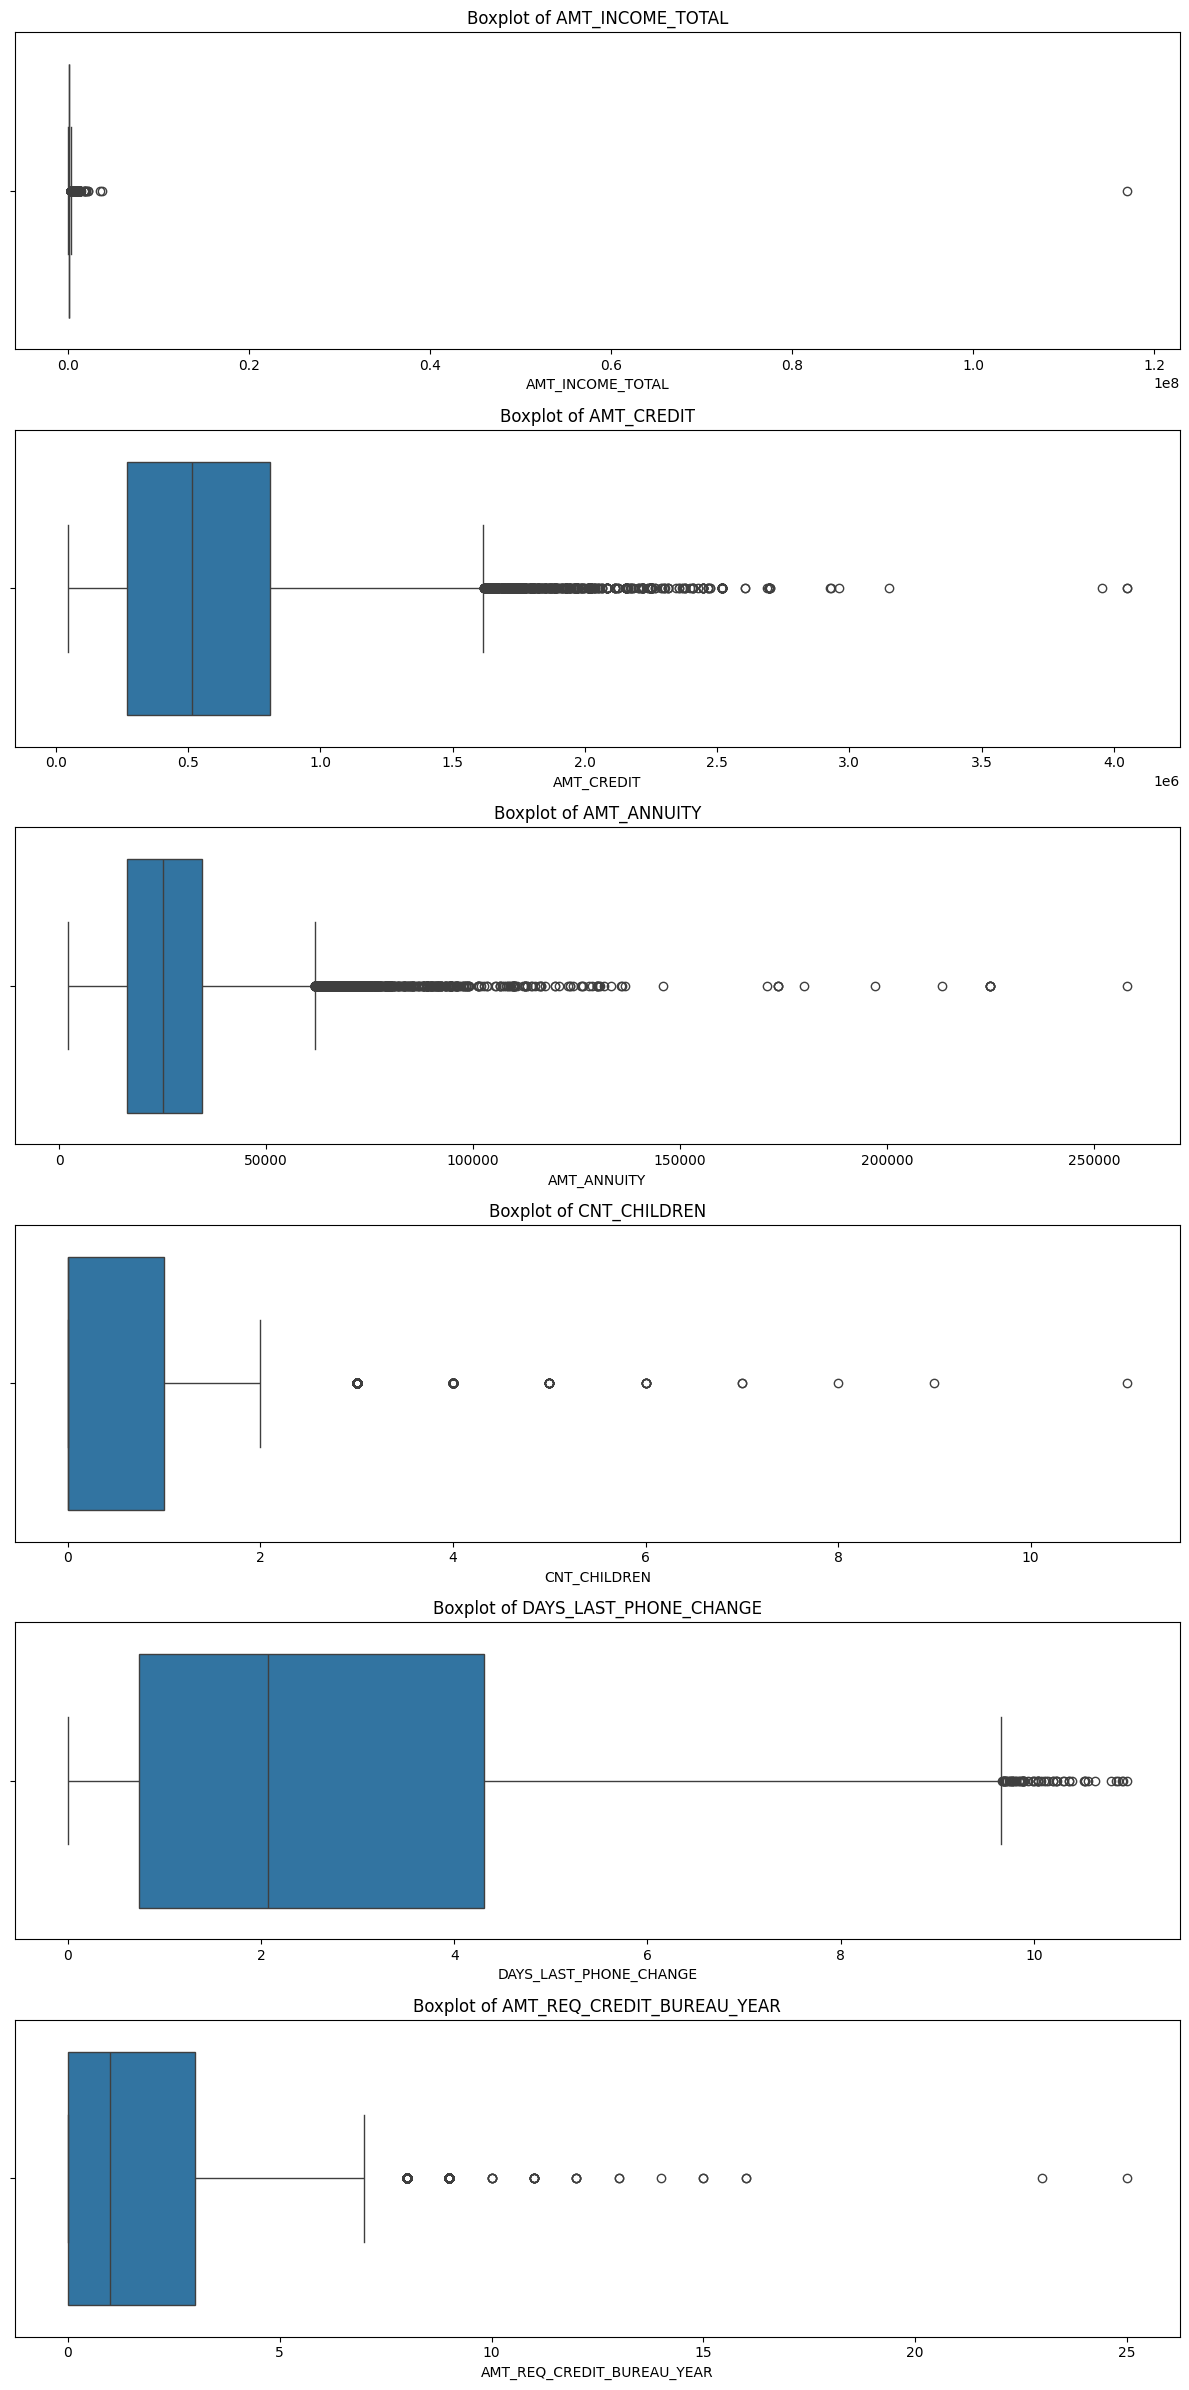

In [ ]:
import seaborn as sns
# A simple function to plot boxplots for given numerical columns
def plot_outliers(df_reduced, columns):
    plt.figure(figsize=(12, len(columns) * 4))  # Adjust the figure size for better visibility
    for i, col in enumerate(columns):
        plt.subplot(len(columns), 1, i + 1)  # Create a subplot for each column
        sns.boxplot(x=df_reduced[col])  # Plot a boxplot for the column
        plt.title(f'Boxplot of {col}')  # Give the plot a title for clarity
    plt.tight_layout()  # Adjust subplots to fit into the figure area nicely
    plt.show()

# List of numerical columns you might want to check for outliers
numerical_cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'CNT_CHILDREN',
                  'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_YEAR']

# Call the function with the dataframe and the list of columns
plot_outliers(df_reduced, numerical_cols)


In [ ]:
def remove_outliers(df_reduced, columns):
    for col in columns:
        Q1 = df_reduced[col].quantile(0.25)
        Q3 = df_reduced[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers from the dataframe
        df_reduced = df_reduced[(df_reduced [col] >= lower_bound) & (df_reduced [col] <= upper_bound)]
    return df_reduced

# Columns to clean for outliers
columns_to_clean = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'CNT_CHILDREN',
                    'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_YEAR']

# Apply the outlier removal function
df_clean = remove_outliers(df_reduced, columns_to_clean)

# Show how much data remains after removing outliers
print(f"Original data size: {df.shape[0]} entries")
print(f"Cleaned data size: {df_clean.shape[0]} entries, after removing outliers")

# Optionally, display the first few rows of the cleaned dataframe
df_clean.head()


Original data size: 49999 entries
Cleaned data size: 44909 entries, after removing outliers


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,3.106849,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,1.0,0.0,2.268493,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,2.232877,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,2.0,0.0,1.690411,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,3.030137,0.0,0.0,0.0,0.0,0.0,0.0


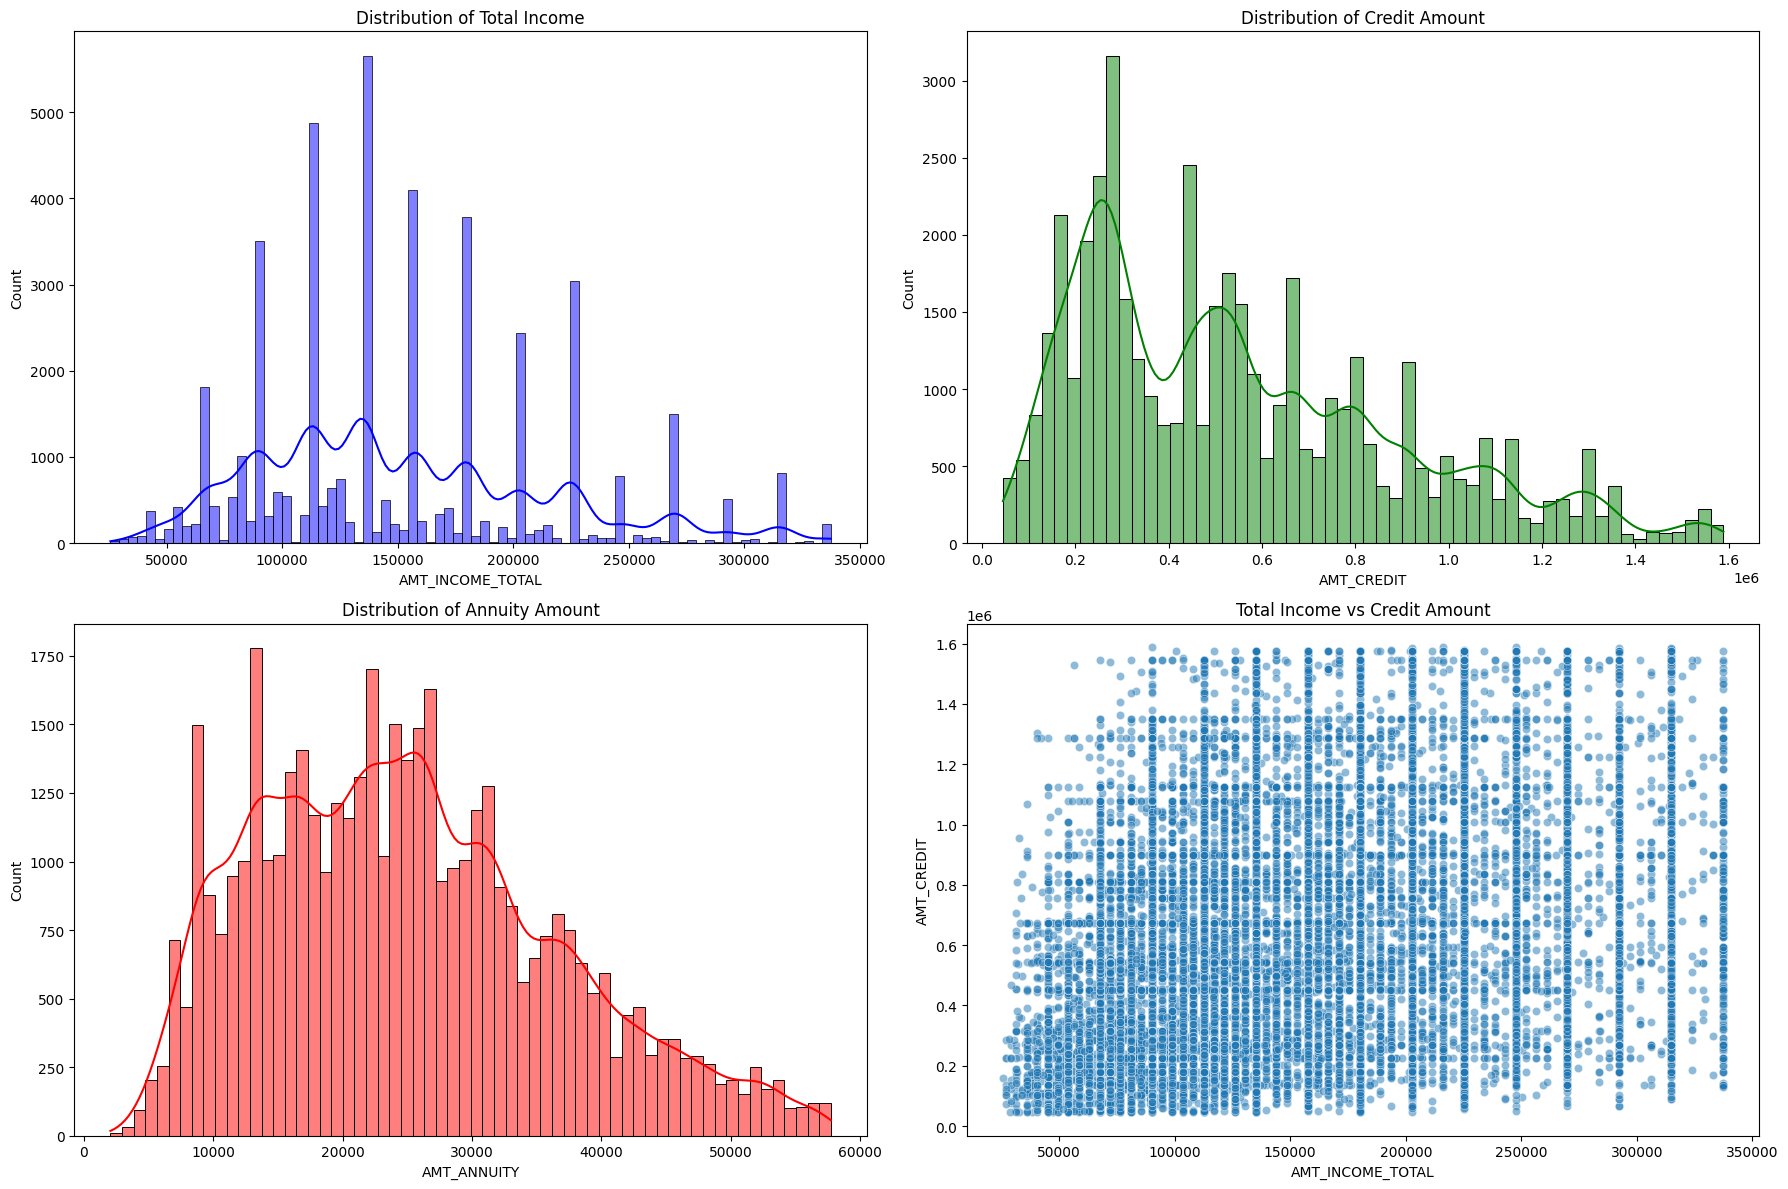

In [ ]:
# Setting up the visualizations for the cleaned data

plt.figure(figsize=(18, 12))

# Histogram for AMT_INCOME_TOTAL
plt.subplot(2, 2, 1)
sns.histplot(df_clean['AMT_INCOME_TOTAL'], kde=True, color='blue')
plt.title('Distribution of Total Income')

# Histogram for AMT_CREDIT
plt.subplot(2, 2, 2)
sns.histplot(df_clean['AMT_CREDIT'], kde=True, color='green')
plt.title('Distribution of Credit Amount')

# Histogram for AMT_ANNUITY
plt.subplot(2, 2, 3)
sns.histplot(df_clean['AMT_ANNUITY'], kde=True, color='red')
plt.title('Distribution of Annuity Amount')

# Scatter plot for AMT_INCOME_TOTAL vs AMT_CREDIT
plt.subplot(2, 2, 4)
sns.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT', data=df_clean, alpha=0.5)
plt.title('Total Income vs Credit Amount')

plt.tight_layout()
plt.show()


In [ ]:
# Analyzing the data imbalance in the 'TARGET' column which indicates loan defaults (1) and non-defaults (0)
target_counts = df_clean['TARGET'].value_counts()
imbalance_ratio = target_counts[0] / target_counts[1]

# Display the counts of each class and the calculated ratio of imbalance
target_counts, imbalance_ratio


(TARGET
 0    41238
 1     3671
 Name: count, dtype: int64,
 11.233451375646963)

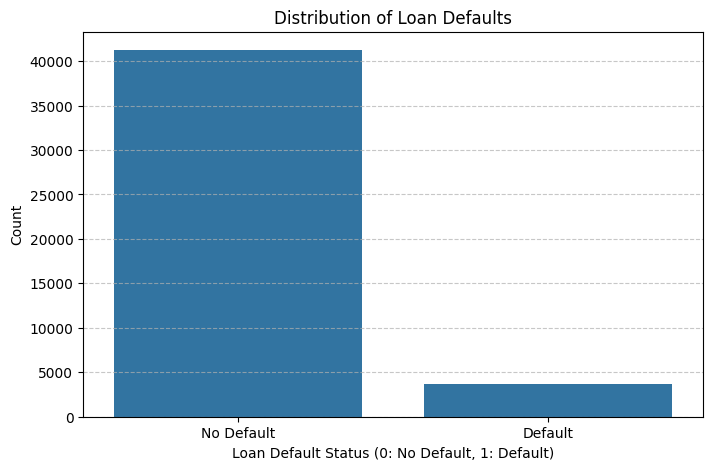

In [ ]:
# Visualizing the data imbalance in the 'TARGET' column
plt.figure(figsize=(8, 5))
sns.countplot(x='TARGET', data=df_clean)
plt.title('Distribution of Loan Defaults')
plt.xlabel('Loan Default Status (0: No Default, 1: Default)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Default', 'Default'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# Assuming 'target_counts' holds the counts of each class from df_clean['TARGET'].value_counts()
imbalance_ratio = target_counts[0] / target_counts[1]
print("The ratio of non-defaults to defaults is:", imbalance_ratio)


The ratio of non-defaults to defaults is: 11.233451375646963


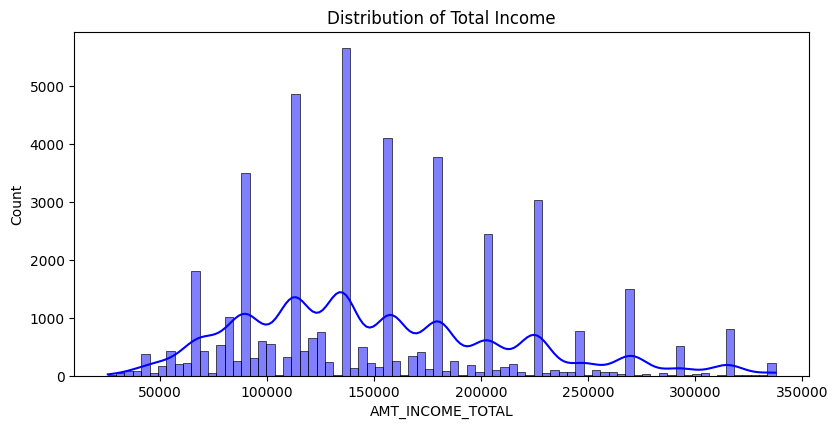

In [ ]:
# Setting up univariate analysis for several key variables
plt.figure(figsize=(16, 12))

# Histogram for AMT_INCOME_TOTAL
plt.subplot(3, 2, 1)
sns.histplot(df_clean['AMT_INCOME_TOTAL'], kde=True, color='blue')
plt.title('Distribution of Total Income')
plt.tight_layout()
plt.show()

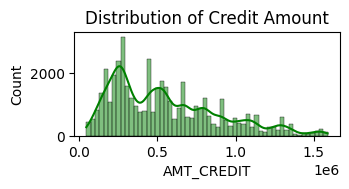

In [ ]:
# Histogram for AMT_CREDIT
plt.subplot(3, 2, 2)
sns.histplot(df_clean['AMT_CREDIT'], kde=True, color='green')
plt.title('Distribution of Credit Amount')
plt.tight_layout()
plt.show()

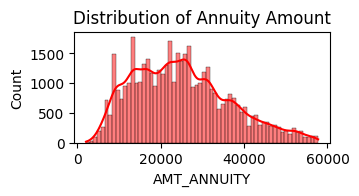

In [ ]:
# Histogram for AMT_ANNUITY
plt.subplot(3, 2, 3)
sns.histplot(df_clean['AMT_ANNUITY'], kde=True, color='red')
plt.title('Distribution of Annuity Amount')
plt.tight_layout()
plt.show()

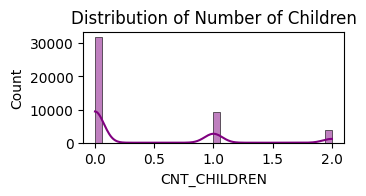

In [ ]:
# Histogram for CNT_CHILDREN
plt.subplot(3, 2, 4)
sns.histplot(df_clean['CNT_CHILDREN'], kde=True, color='purple')
plt.title('Distribution of Number of Children')
plt.tight_layout()
plt.show()

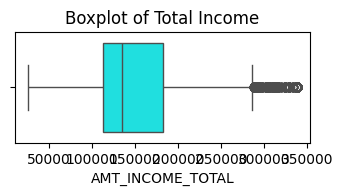

In [ ]:
# Boxplot for AMT_INCOME_TOTAL
plt.subplot(3, 2, 5)
sns.boxplot(x=df_clean['AMT_INCOME_TOTAL'], color='cyan')
plt.title('Boxplot of Total Income')
plt.tight_layout()
plt.show()

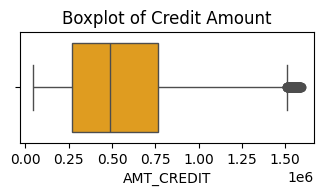

In [ ]:
# Boxplot for AMT_CREDIT
plt.subplot(3, 2, 6)
sns.boxplot(x=df_clean['AMT_CREDIT'], color='orange')
plt.title('Boxplot of Credit Amount')
plt.tight_layout()
plt.show()

In [ ]:
#segmented univerate analysis
# Setting up segmented univariate analysis for the same variables, split by default status
plt.figure(figsize=(16, 18))

<Figure size 1600x1800 with 0 Axes>

<Figure size 1600x1800 with 0 Axes>

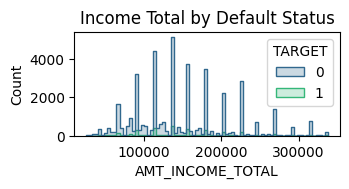

In [ ]:
# Histogram for AMT_INCOME_TOTAL segmented by TARGET
plt.subplot(3, 2, 1)
sns.histplot(data=df_clean, x='AMT_INCOME_TOTAL', hue='TARGET', element='step', palette='viridis')
plt.title('Income Total by Default Status')
plt.tight_layout()
plt.show()

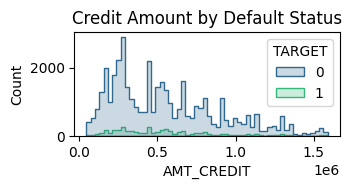

In [ ]:
# Histogram for AMT_CREDIT segmented by TARGET
plt.subplot(3, 2, 2)
sns.histplot(data=df_clean, x='AMT_CREDIT', hue='TARGET', element='step', palette='viridis')
plt.title('Credit Amount by Default Status')
plt.tight_layout()
plt.show()

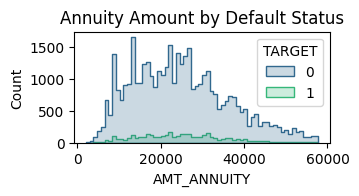

In [ ]:
# Histogram for AMT_ANNUITY segmented by TARGET
plt.subplot(3, 2, 3)
sns.histplot(data=df_clean, x='AMT_ANNUITY', hue='TARGET', element='step', palette='viridis')
plt.title('Annuity Amount by Default Status')
plt.tight_layout()
plt.show()

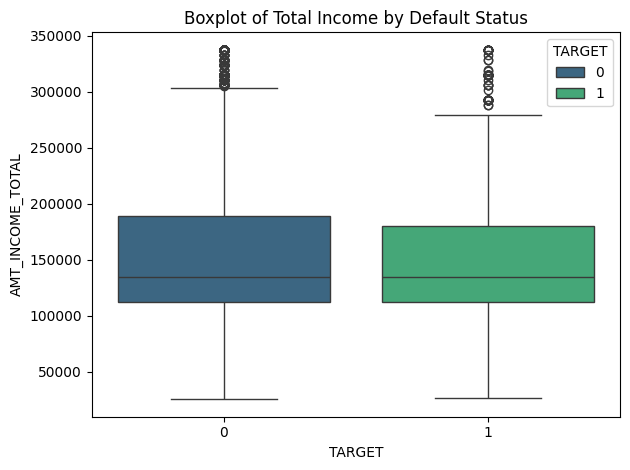

In [ ]:
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=df_clean, hue='TARGET', palette='viridis', dodge=False)
plt.title('Boxplot of Total Income by Default Status')
plt.tight_layout()
plt.show()


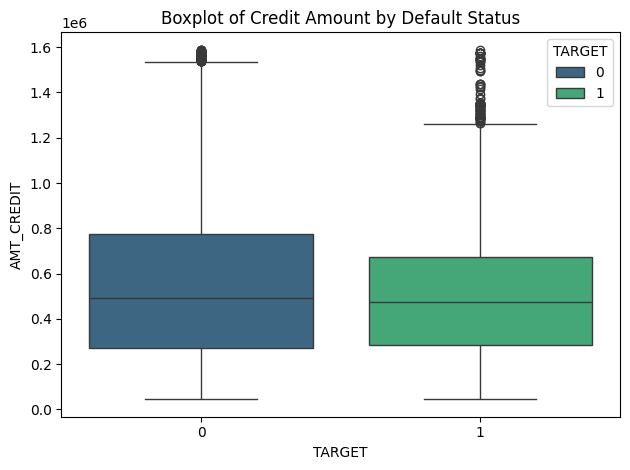

In [ ]:
# Boxplot for AMT_CREDIT segmented by TARGET
sns.boxplot(x='TARGET', y='AMT_CREDIT', data=df_clean, hue='TARGET', palette='viridis', dodge=False)
plt.title('Boxplot of Credit Amount by Default Status')
plt.tight_layout()
plt.show()


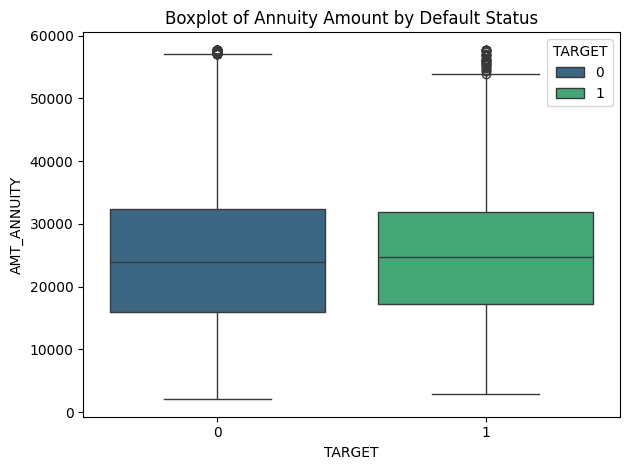

In [ ]:
# Boxplot for AMT_ANNUITY segmented by TARGET
sns.boxplot(x='TARGET', y='AMT_ANNUITY', data=df_cleaned, hue='TARGET', palette='viridis', dodge=False)
plt.title('Boxplot of Annuity Amount by Default Status')
plt.tight_layout()
plt.show()


In [ ]:
#bivariate analysis
# Setting up the figure for multiple plots
plt.figure(figsize=(16, 12))

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

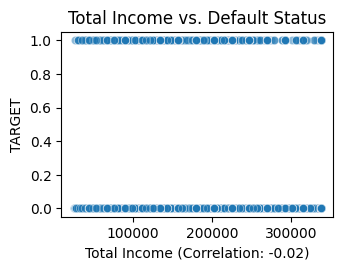

In [ ]:
# Scatter plot and correlation for AMT_INCOME_TOTAL vs TARGET
plt.subplot(2, 2, 1)
sns.scatterplot(x='AMT_INCOME_TOTAL', y='TARGET', data=df_clean, alpha=0.5)
plt.title('Total Income vs. Default Status')
correlation_income = df_clean['AMT_INCOME_TOTAL'].corr(df_clean['TARGET'])
plt.xlabel(f'Total Income (Correlation: {correlation_income:.2f})')
plt.tight_layout()
plt.show()

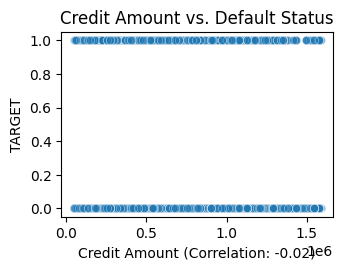

In [ ]:
# Scatter plot and correlation for AMT_CREDIT vs TARGET
plt.subplot(2, 2, 2)
sns.scatterplot(x='AMT_CREDIT', y='TARGET', data=df_clean, alpha=0.5)
plt.title('Credit Amount vs. Default Status')
correlation_credit = df_clean['AMT_CREDIT'].corr(df_clean['TARGET'])
plt.xlabel(f'Credit Amount (Correlation: {correlation_credit:.2f})')
plt.tight_layout()
plt.show()

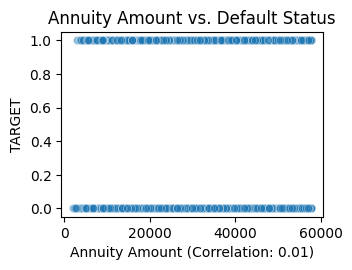

In [ ]:
# Scatter plot and correlation for AMT_ANNUITY vs TARGET
plt.subplot(2, 2, 3)
sns.scatterplot(x='AMT_ANNUITY', y='TARGET', data=df_clean, alpha=0.5)
plt.title('Annuity Amount vs. Default Status')
correlation_annuity = df_clean['AMT_ANNUITY'].corr(df_clean['TARGET'])
plt.xlabel(f'Annuity Amount (Correlation: {correlation_annuity:.2f})')
plt.tight_layout()
plt.show()

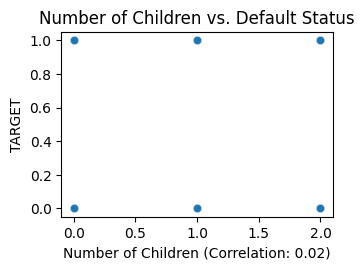

In [ ]:
# Scatter plot and correlation for CNT_CHILDREN vs TARGET
plt.subplot(2, 2, 4)
sns.scatterplot(x='CNT_CHILDREN', y='TARGET', data=df_clean, alpha=0.5)
plt.title('Number of Children vs. Default Status')
correlation_children = df_clean['CNT_CHILDREN'].corr(df_clean['TARGET'])
plt.xlabel(f'Number of Children (Correlation: {correlation_children:.2f})')
plt.tight_layout()
plt.show()

In [ ]:
#Create stacked bar charts for categorical variables
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

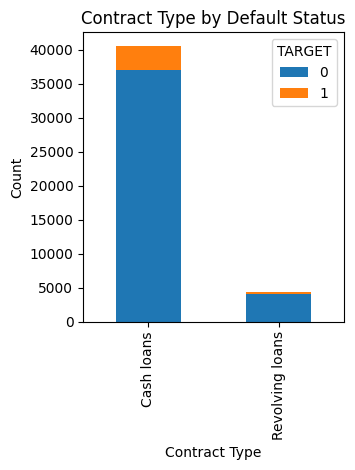

In [ ]:
# Stacked bar chart for NAME_CONTRACT_TYPE
plt.subplot(1, 2, 1)
contract_type_counts = pd.crosstab(df_clean['NAME_CONTRACT_TYPE'], df_clean['TARGET'])
contract_type_counts.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Contract Type by Default Status')
plt.ylabel('Count')
plt.xlabel('Contract Type')
plt.tight_layout()
plt.show()

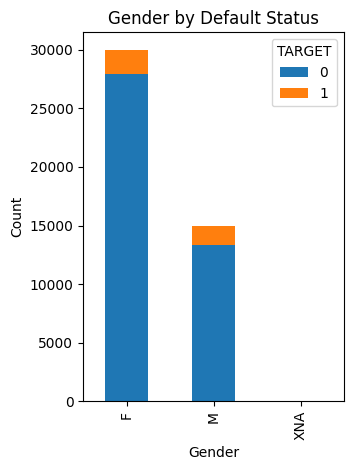

In [ ]:
# Stacked bar chart for CODE_GENDER
plt.subplot(1, 2, 2)
gender_counts = pd.crosstab(df_clean['CODE_GENDER'], df_clean['TARGET'])
gender_counts.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Gender by Default Status')
plt.ylabel('Count')
plt.xlabel('Gender')
plt.tight_layout()
plt.show()

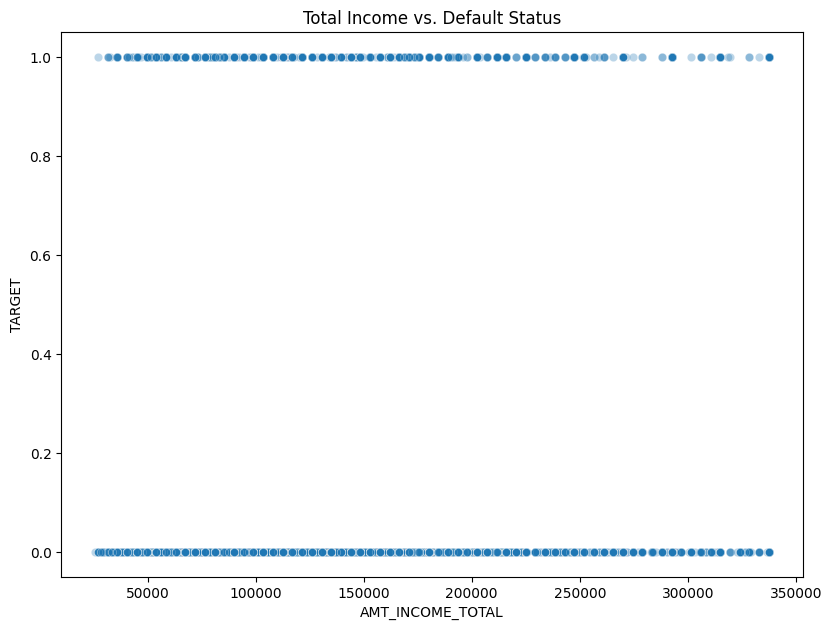

In [ ]:
#Create scatter plots for continuous variables vs. TARGET
plt.figure(figsize=(16, 12))

# Scatter plot for AMT_INCOME_TOTAL vs TARGET
plt.subplot(2, 2, 1)
sns.scatterplot(x='AMT_INCOME_TOTAL', y='TARGET', data=df_clean, alpha=0.3)
plt.title('Total Income vs. Default Status')
plt.tight_layout()
plt.show()

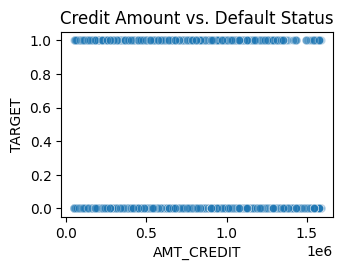

In [ ]:
# Scatter plot for AMT_CREDIT vs TARGET
plt.subplot(2, 2, 2)
sns.scatterplot(x='AMT_CREDIT', y='TARGET', data=df_clean, alpha=0.3)
plt.title('Credit Amount vs. Default Status')
plt.tight_layout()
plt.show()

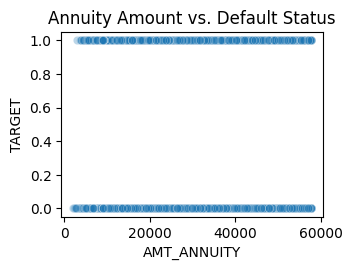

In [ ]:
# Scatter plot for AMT_ANNUITY vs TARGET
plt.subplot(2, 2, 3)
sns.scatterplot(x='AMT_ANNUITY', y='TARGET', data=df_clean, alpha=0.3)
plt.title('Annuity Amount vs. Default Status')
plt.tight_layout()
plt.show()

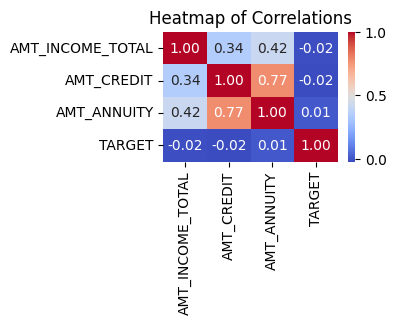

In [ ]:
# Create a heatmap of correlations among selected variables and the target
plt.subplot(2, 2, 4)
correlation_matrix = df_clean[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'TARGET']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlations')
plt.tight_layout()
plt.show()

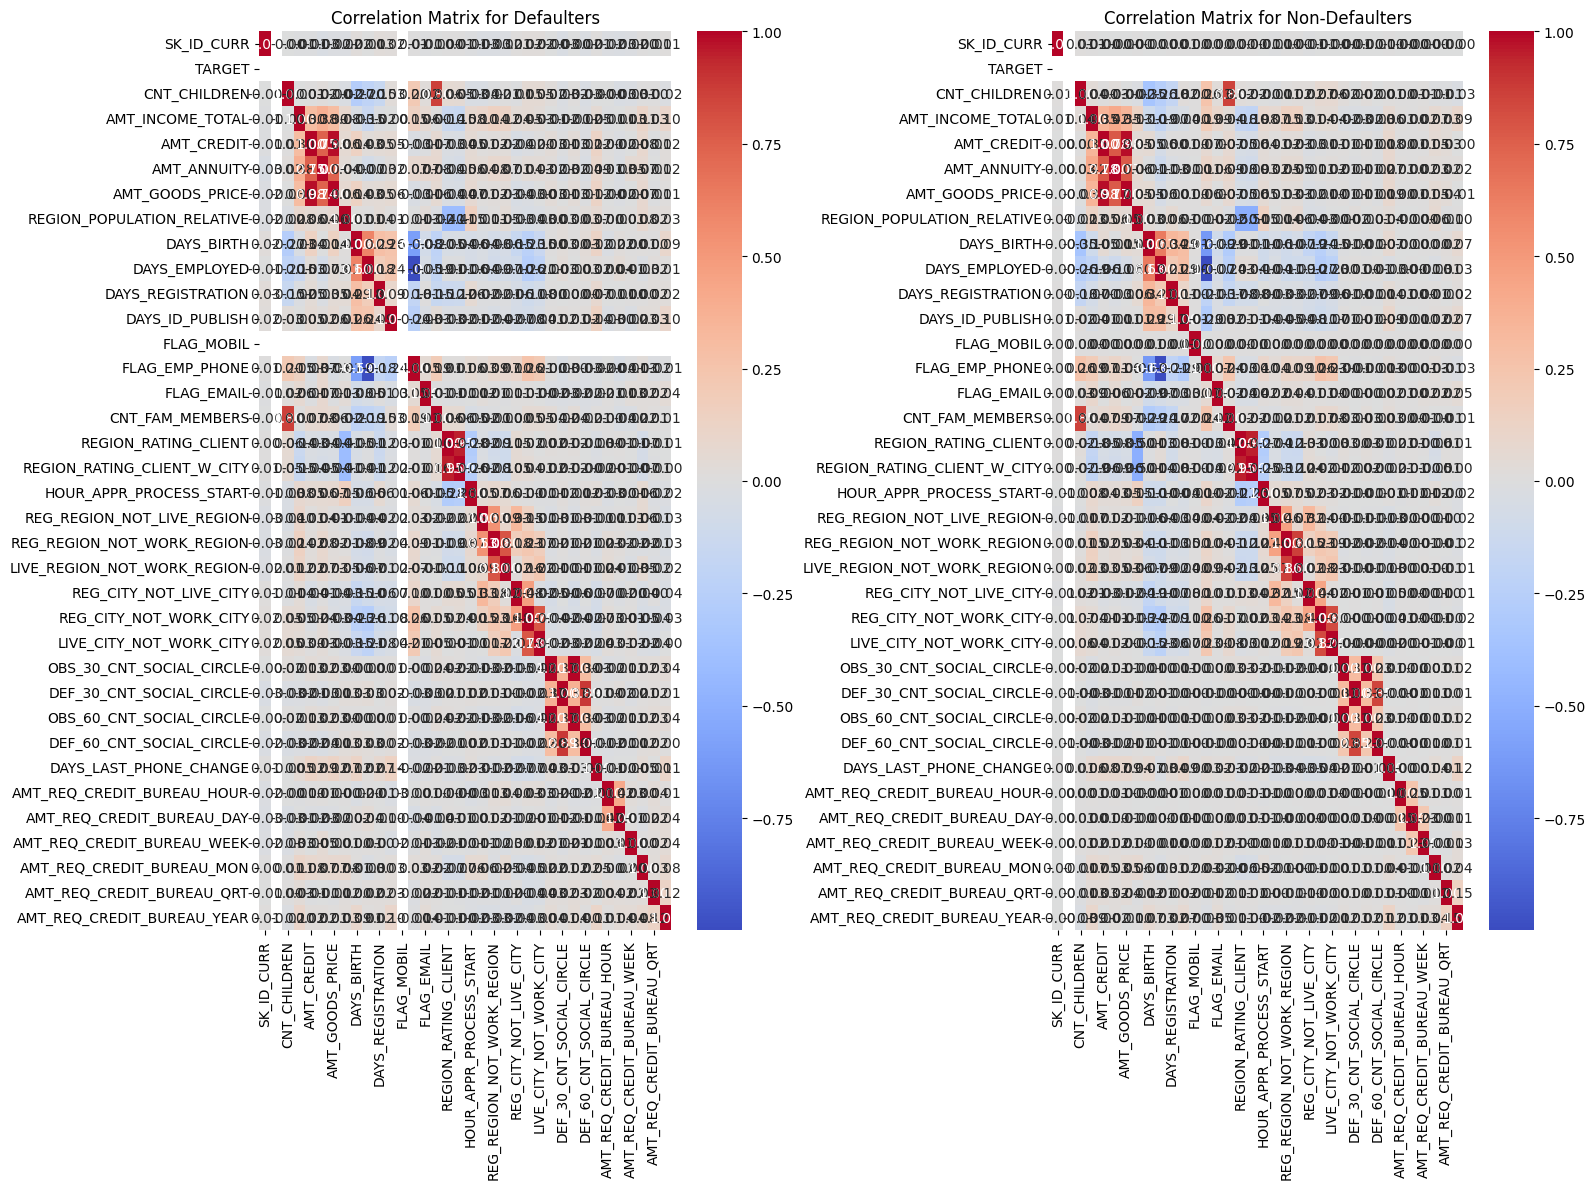

In [ ]:
# Segment the dataset based on the TARGET value
defaulters = df_clean[df_clean['TARGET'] == 1]
non_defaulters = df_clean[df_clean['TARGET'] == 0]

# Filter only numeric columns for correlation calculations
numeric_columns = df_clean.select_dtypes(include=[np.number]).columns

# Calculate correlation matrices for each segment using only numeric columns
correlation_defaulters = defaulters[numeric_columns].corr()
correlation_non_defaulters = non_defaulters[numeric_columns].corr()

# Plotting heatmaps for each correlation matrix
plt.figure(figsize=(16, 12))

# Heatmap for clients with payment difficulties
plt.subplot(1, 2, 1)
sns.heatmap(correlation_defaulters, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Defaulters')

# Heatmap for all other cases
plt.subplot(1, 2, 2)
sns.heatmap(correlation_non_defaulters, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Non-Defaulters')

plt.tight_layout()
plt.show()


In [ ]:
numeric_df = df_clean.select_dtypes(include=[np.number])

correlation_matrix = numeric_df.corr()

target_correlations = correlation_matrix['TARGET'].sort_values(key=abs, ascending=False)

top_target_correlations = target_correlations.head(10)  # Display top 10 correlations
top_target_correlations


,TARGET
TARGET,1.000000
DAYS_BIRTH,-0.078662
REGION_RATING_CLIENT_W_CITY,0.062467
REGION_RATING_CLIENT,0.061507
DAYS_LAST_PHONE_CHANGE,-0.059586
REG_CITY_NOT_WORK_CITY,0.052364
DAYS_ID_PUBLISH,-0.049297
DAYS_EMPLOYED,-0.045636
DAYS_REGISTRATION,-0.044833
FLAG_EMP_PHONE,0.044620


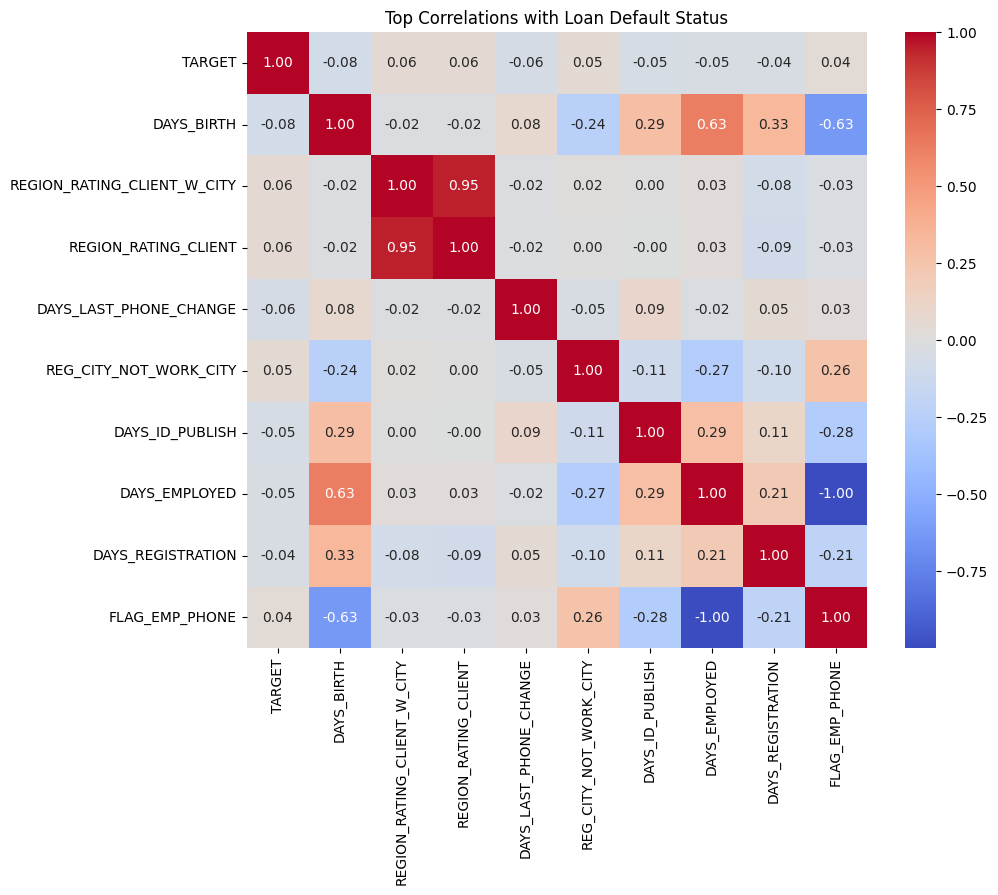

In [ ]:
# Assuming 'correlation_matrix' and 'top_target_correlations' are already defined
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix.loc[top_target_correlations.index, top_target_correlations.index],
            annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Top Correlations with Loan Default Status')
plt.show()




